# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = '392' # Japan
# Period
period = '2019' # Annual

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, period + '12', 'HS', 'M')
print(status)
status = tta.data_available(partner, period + '12', 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '392', 'rDesc': 'Japan', 'ps': '201912', 'TotalRecords': 165846, 'isOriginal': 1, 'publicationDate': '2020-02-05T00:00:00', 'isPartnerDetail': 1}]


# CTH2

In [4]:
cc = 'AG2' # AG2, AG4, AG6
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df2 = tta.prepare(data)

{'r': '699', 'p': '392', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}
{'r': '392', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}


In [5]:
df2['QR'] = df2['quantity_a'] / df2['quantity_b']
df2['VR'] = df2['value_a'] / df2['value_b']
df2.sort_values(by=['code'])

code                                               desc  quantity_a  \
03   03  Fish and crustaceans, molluscs and other aquat...           0   
04   04  Dairy produce; birds' eggs; natural honey; edi...           0   
05   05  Animal originated products; not elsewhere spec...           0   
06   06  Trees and other plants, live; bulbs, roots and...           0   
07   07    Vegetables and certain roots and tubers; edible           0   
08   08  Fruit and nuts, edible; peel of citrus fruit o...           0   
09   09                       Coffee, tea, mate and spices           0   
10   10                                            Cereals           0   
11   11  Products of the milling industry; malt, starch...           0   
12   12  Oil seeds and oleaginous fruits; miscellaneous...           0   
13   13  Lac; gums, resins and other vegetable saps and...           0   
14   14  Vegetable plaiting materials; vegetable produc...           0   
15   15  Animal or vegetable fats and oils and their cl...           0   
16   16  Meat, fish or crustaceans, molluscs or other a...           0   
17   17                     Sugars and sugar confectionery           0   
18   18                       Cocoa and cocoa preparations           0   
19   19  Preparations of cereals, flour, starch or milk...           0   
20   20  Preparations of vegetables, fruit, nuts or oth...           0   
21   21                  Miscellaneous edible preparations           0   
22   22                     Beverages, spirits and vinegar           0   
23   23  Food industries, residues and wastes thereof; ...           0   
24   24       Tobacco and manufactured tobacco substitutes           0   
25   25  Salt; sulphur; earths, stone; plastering mater...           0   
26   26                                 Ores, slag and ash           0   
27   27  Mineral fuels, mineral oils and products of th...           0   
28   28  Inorganic chemicals; organic and inorganic com...           0   
29   29                                  Organic chemicals           0   
30   30                            Pharmaceutical products           0   
31   31                                        Fertilizers           0   
32   32  Tanning or dyeing extracts; tannins and their ...           0   
33   33  Essential oils and resinoids; perfumery, cosme...           0   
34   34  Soap, organic surface-active agents; washing, ...           0   
35   35  Albuminoidal substances; modified starches; gl...           0   
36   36  Explosives; pyrotechnic products; matches; pyr...           0   
37   37              Photographic or cinematographic goods           0   
38   38                           Chemical products n.e.c.           0   
39   39                      Plastics and articles thereof           0   
40   40                        Rubber and articles thereof           0   
41   41  Raw hides and skins (other than furskins) and ...           0   
42   42  Articles of leather; saddlery and harness; tra...           0   
44   44           Wood and articles of wood; wood charcoal           0   
45   45                          Cork and articles of cork           0   
46   46  Manufactures of straw, esparto or other plaiti...           0   
47   47  Pulp of wood or other fibrous cellulosic mater...           0   
48   48  Paper and paperboard; articles of paper pulp, ...           0   
49   49  Printed books, newspapers, pictures and other ...           0   
50   50                                               Silk           0   
51   51  Wool, fine or coarse animal hair; horsehair ya...           0   
52   52                                             Cotton           0   
53   53  Vegetable textile fibres; paper yarn and woven...           0   
54   54  Man-made filaments; strip and the like of man-...           0   
55   55                             Man-made staple fibres           0   
56   56  Wadding, felt and nonwovens, special yarns; tw...           0   
57   57

In [6]:
df2.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH4

In [7]:
cc = 'AG4' # AG2, AG4, AG6
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df4 = tta.prepare(data)

{'r': '699', 'p': '392', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': '392', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


In [8]:
df4['QR'] = df4['quantity_a'] / df4['quantity_b']
df4['VR'] = df4['value_a'] / df4['value_b']
df4.sort_values(by=['code'])

code                                               desc  quantity_a  \
0301  0301                                         Fish; live        3450   
0302  0302  Fish; fresh or chilled, excluding fish fillets...        1263   
0303  0303  Fish; frozen, excluding fish fillets and other...        9394   
0304  0304  Fish fillets and other fish meat (whether or n...       10634   
0306  0306  Crustaceans; in shell or not, live, fresh, chi...       26506   
0307  0307  Molluscs; whether in shell or not, live, fresh...       32154   
0405  0405  Butter and other fats and oils derived from mi...         330   
0409  0409                                     Honey; natural         100   
0508  0508  Coral and similar materials, unworked or simpl...          14   
0511  0511  Animal products not elsewhere specified or inc...           0   
0602  0602  Plants, live; n.e.c. in heading no. 0601, (inc...         171   
0710  0710  Vegetables (uncooked or cooked by steaming or ...       32298   
0712  0712  Vegetables, dried; whole, cut, sliced, broken ...       38839   
0801  0801  Nuts, edible; coconuts, Brazil nuts and cashew...       24182   
0805  0805                       Citrus fruit; fresh or dried          80   
0810  0810                 Fruit, fresh; n.e.c. in chapter 08         150   
0814  0814  Peel of citrus fruit or melons (including wate...           0   
0902  0902                                                Tea       10967   
0904  0904  Pepper of the genus piper; dried or crushed or...        5710   
0909  0909  Seeds of anise, badian, fennel, coriander, cum...       28650   
0910  0910  Ginger, saffron, tumeric (curcuma), thyme, bay...       21494   
1006  1006                                               Rice       39758   
1103  1103                    Cereal groats; meal and pellets         480   
1108  1108                                   Starches; inulin        6550   
1202  1202  Ground-nuts; not roasted or otherwise cooked, ...       18000   
1209  1209  Seeds, fruit and spores; of a kind used for so...      134031   
1211  1211  Plants and parts of plants (including seeds an...         570   
1212  1212  Locust beans, seaweeds and other algae, sugar ...           0   
1213  1213  Cereal straw and husks, unprepared; whether or...           0   
1301  1301  Lac; natural gums, resins, gum-resins and oleo...         833   
1302  1302  Vegetable saps and extracts; pectic substances...       17284   
1404  1404  Vegetable products not elsewhere specified or ...           0   
1505  1505  Wool grease and fatty substances derived there...       28896   
1509  1509  Olive oil and its fractions; whether or not re...          43   
1512  1512  Sun-flower seed, safflower or cotton-seed oil ...         133   
1514  1514  Rape, colza or mustard oil and their fractions...         180   
1515  1515  Fixed vegetable fats and oils (including jojob...        3369   
1516  1516  Animal or vegetable fats and oils and their fr...          20   
1518  1518  Animal or vegetable fats, oils, fractions, mod...          18   
1520  1520  Glycerol, crude; glycerol waters and glycerol ...           1   
1521  1521  Vegetable waxes (other than triglycerides), be...         801   
1603  1603  Extracts and juices of meat, fish or crustacea...           0   
1604  1604  Prepared or preserved fish; caviar and caviar ...        3034   
1605  1605  Crustaceans, molluscs and other aquatic invert...       16770   
1701  1701  Cane or beet sugar and chemically pure sucrose...       13020   
1702  1702  Sugars, including lactose, maltose, glucose or...       42491   
1704  1704  Sugar confectionery (including white chocolate...         242   
1805  1805  Cocoa; powder, not containing added sugar or o...        3300   
1806  1806  Chocolate and other food preparations containi...       16475   
1901  1901  Malt extract; flour/groats/meal/starch/malt ex...         200   
1902  1902  Pasta; whether or not cooked or stuffed with m...       15135   
19

In [9]:
df4.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH6

In [10]:
cc = 'AG6' # AG2, AG4, AG6
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df6 = tta.prepare(data)

{'r': '699', 'p': '392', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}
{'r': '392', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}


In [11]:
df6['QR'] = df6['quantity_a'] / df6['quantity_b']
df6['VR'] = df6['value_a'] / df6['value_b']
df6.sort_values(by=['code'])

code                                               desc  quantity_a  \
030111  030111                 Fish; live, ornamental, freshwater           0   
030119  030119      Fish; live, ornamental, other than freshwater        2100   
030199  030199                 Fish; live, n.e.c. in heading 0301        1350   
030213  030213  Fish; fresh or chilled, Pacific salmon (Oncorh...           0   
030214  030214  Fish; fresh or chilled, Atlantic salmon (Salmo...         972   
030221  030221  Fish; fresh or chilled, halibut (Reinhardtius ...         212   
030234  030234  Fish; fresh or chilled, bigeye tunas (Thunnus ...          28   
030235  030235  Fish; fresh or chilled, Atlantic and Pacific b...          31   
030244  030244  Fish; fresh or chilled, mackerel (Scomber scom...           0   
030284  030284  Fish; fresh or chilled, seabass (Dicentrarchus...          20   
030312  030312  Fish; frozen, Pacific salmon (Oncorhynchus gor...        1990   
030313  030313  Fish; frozen, Atlantic salmon (Salmo salar) an...        1143   
030326  030326  Fish; frozen, eels (Anguilla spp.), excluding ...         135   
030329  030329  Fish; frozen, Nile perch (Lates niloticus) and...          30   
030342  030342  Fish; frozen, yellowfin tunas (Thunnus albacar...        1805   
030344  030344  Fish; frozen, bigeye tunas (Thunnus obesus), e...         100   
030354  030354  Fish; frozen, mackerel (Scomber scombrus, Scom...        1010   
030363  030363  Fish; frozen, cod (Gadus morhua, Gadus ogac, G...        2157   
030384  030384  Fish; frozen, seabass (Dicentrarchus spp.), ex...          70   
030389  030389  Fish; frozen, n.e.c. in heading 0303, excludin...         528   
030391  030391                Fish; frozen, livers, roes and milt         413   
030399  030399  Fish; frozen, fish fins (other than shark fins...          13   
030439  030439  Fish fillets; fresh or chilled, carp (as speci...          52   
030441  030441  Fish fillets; fresh or chilled, salmon, Pacifi...          25   
030449  030449  Fish fillets; fresh or chilled, other than fis...        2725   
030459  030459  Fish meat; excluding fillets, whether or not m...          51   
030471  030471  Fish fillets; frozen, cod (Gadus morhua, Gadus...          19   
030479  030479  Fish fillets; frozen, of the families Bregmace...         159   
030482  030482  Fish fillets; frozen, trout (Salmo trutta, Onc...           0   
030483  030483  Fish fillets; frozen, flat fish (Pleuronectida...           0   
030487  030487  Fish fillets; frozen, tunas (of the genus Thun...        2133   
030489  030489  Fish fillets; frozen, of fish n.e.c. in headin...        3128   
030499  030499  Fish meat, excluding fillets, whether or not m...        2342   
030614  030614  Crustaceans; frozen, crabs, in shell or not, s...          47   
030616  030616  Crustaceans; frozen, cold-water shrimps and pr...          98   
030617  030617  Crustaceans; frozen, shrimps and prawns, exclu...       26361   
030722  030722  Molluscs; scallops, whether in shell or not, i...          30   
030729  030729  Molluscs; scallops, whether in shell or not, i...          34   
030749  030749  Molluscs; cuttle fish and squid, whether in sh...       32000   
030759  030759  Molluscs; octopus (Octopus spp.), dried, salte...          90   
030792  030792  Molluscs; n.e.c. in heading 0307, whether in s...           0   
040590  040590  Dairy produce; fats and oils derived from milk...         330   
040900  040900                                     Honey; natural         100   
050800  050800  Animal products; coral and similar materials, ...          14   
051191  051191  Animal products; of fish or crustaceans, mollu...           0   
060290  060290           Plants, live; n.e.c. in heading no. 0602         171   
071080  071080  Vegetables; uncooked or cooked by steaming or ...       32298   
071220  071220  Vegetables; onions, whole, cut, sliced, broken...       38839   
080132  080132  Nuts, edible; cashew nuts

In [12]:
df6.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# Summary

In [13]:
print("Total import, as per reporter data:", df6['value_a'].sum(), " million USD.")
print("Total export, as per partner data:", df6['value_b'].sum(), " million USD.")

Total import, as per reporter data: 12744.14  million USD.
Total export, as per partner data: 10978.09  million USD.


# Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%. You can change the value to better fit the data.

In [23]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 10 # value to filter

df = df4 # Change to required data_frame df2, df4, df6
df = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
df.sort_values(by=['code'], ascending=True)

code                                               desc  quantity_a  \
2704  2704  Coke and semi-coke; of coal, lignite or peat, ...   294763000   
2707  2707  Oils and other products of the distillation of...     1003562   
2708  2708  Pitch and pitch coke; obtained from coal tar o...     6501000   
2710  2710  Petroleum oils and oils from bituminous minera...    16621255   
2715  2715  Bituminous mixtures based on natural asphalt; ...           0   
2815  2815  Sodium hydroxide (caustic soda); potassium hyd...   105719494   
2902  2902                                Cyclic hydrocarbons   340612195   
2929  2929  Nitrogen-function compounds, n.e.c. in chapter 29     9813321   
3403  3403  Lubricating preparations and those used in oil...    27308519   
3808  3808  Insecticides, rodenticides, fungicides, herbic...     2268932   
3815  3815  Reaction initiators, reaction accelerators and...     2337292   
3824  3824  Prepared binders for foundry moulds or cores; ...     4040200   
3915  3915              Waste, parings and scrap, of plastics         300   
3926  3926  Articles of plastics and articles of other mat...     5377462   
4016  4016  Articles of vulcanised rubber other than hard ...     8573080   
7102  7102  Diamonds, whether or not worked, but not mount...          11   
7208  7208  Iron or non-alloy steel; flat-rolled products ...   396151615   
7209  7209  Iron or non-alloy steel; flat-rolled products,...   111948510   
7210  7210  Iron or non-alloy steel; flat-rolled products,...   236381446   
7226  7226  Alloy steel flat-rolled products, of a width o...    10548062   
7228  7228  Alloy steel bars, rods, shapes and sections; h...    47130496   
7302  7302  Railway or tramway track constructions of iron...    81847014   
7318  7318  Screws, bolts, nuts, coach screws, screw hooks...    46185513   
7326  7326      Iron or steel; articles, n.e.c. in chapter 73     6239573   
8207  8207  Tools, interchangeable; for hand tools, whethe...      724398   
8408  8408  Compression-ignition internal combustion pisto...     4162307   
8409  8409  Parts suitable for use solely or principally w...    12142719   
8410  8410  Turbines; hydraulic water wheels and regulator...          86   
8411  8411  Turbo-jets, turbo-propellers and other gas tur...       36360   
8413  8413  Pumps; for liquids, whether or not fitted with...     2987284   
8414  8414  Air or vacuum pumps, air or other gas compress...     4133916   
8415  8415  Air conditioning machines; comprising a motor ...     1999888   
8421  8421  Centrifuges, including centrifugal dryers; fil...     2982979   
8426  8426  Derricks, cranes, including cable cranes, mobi...     2585630   
8428  8428  Lifting, handling, loading or unloading machin...     6806446   
8433  8433  Harvesting and threshing machinery, straw and ...     1242684   
8441  8441  Machines; for making up paper pulp, paper or p...      249094   
8443  8443  Printing machinery; used for printing by means...     2900938   
8445  8445  Textile machinery; spinning, doubling, twistin...     3571310   
8446  8446                           Weaving machines (looms)     6234996   
8454  8454  Converters, ladles, ingot moulds and casting m...     1661645   
8455  8455             Metal-rolling mills and rolls therefor    12637029   
8459  8459  Machine-tools; (including way-type unit head m...     4440192   
8462  8462  Machine-tools; (including presses) for working...    10205995   
8466  8466  Parts & accessories suited for use only/mainly...     1947102   
8467  8467  Tools; for working in the hand, pneumatic, hyd...      765997   
8477  8477  Machinery; for working rubber or plastics or f...    11148053   
8479  8479  Machinery and mechanical appliances; having in...     8685966   
8480  8480  Moulding boxes for metal foundry, moulding pat...      637036   
8503  8503  Electric motors and generators; parts suitable...           0   
8504  8504  Electric transformers, static converters (e.g....     4266969   
85

In [15]:
df.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + 'summary.csv')

# Plot
Change the data to plot

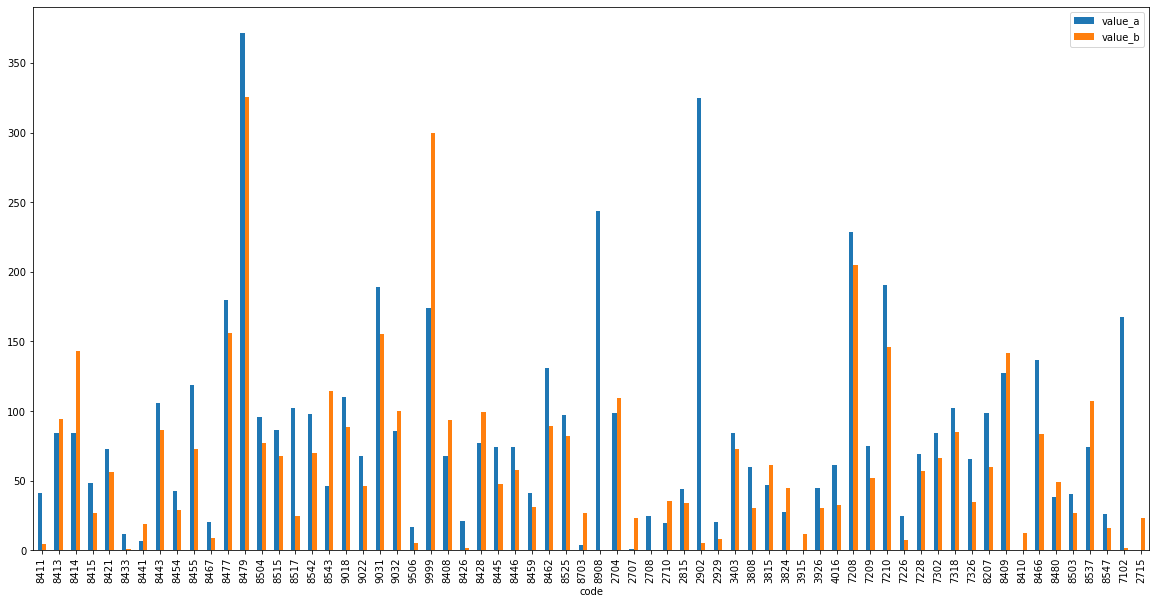

In [24]:
df.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

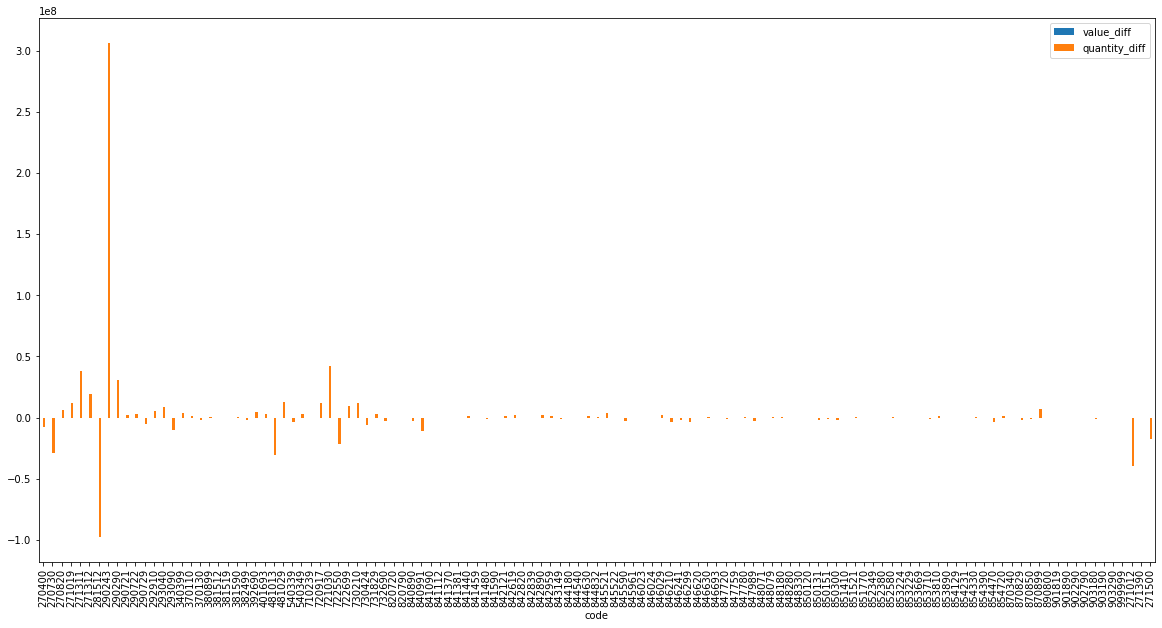

In [17]:
df.plot(kind='bar', y=['value_diff','quantity_diff'], x='code')
plt.show()

# Aggregation

In [18]:
df.drop(['quantity_pct', 'value_pct', 'value_diff_abs', 'value_pct_abs', 'QR', 'VR'], axis=1, inplace=True)
df.loc[:,'CTH6'] = df['code']
df.loc[:,'CTH4'] = df['code'].str[0:4]
df.loc[:,'CTH2'] = df['code'].str[0:2]


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [19]:
dfa = df.groupby(['CTH2']).filter(lambda group: len(group) > 1)
dfa.groupby(['CTH2', 'CTH4']).sum()

quantity_a  value_a  quantity_b  value_b  value_diff  quantity_diff
CTH2 CTH4                                                                     
27   2704   294763000    98.59   302464207   109.65      -11.06       -7701207
     2707     1002000     0.72    30000000    21.53      -20.81      -28998000
     2708     6501000    24.52           0     0.00       24.52        6501000
     2710    16369255    19.67    43671377    35.51      -15.84      -27302122
     2713    57285221   139.91           0   126.81       13.10       57285221
     2715           0     0.00    17498571    23.22      -23.22      -17498571
29   2902   337697242   320.45      142364     0.23      320.22      337554878
     2907     5823166    41.71     5649760    37.80        3.91         173406
     2929     9776593    19.91     4014992     7.03       12.88        5761601
     2930    10411965    26.74    11503200    29.89       -3.15       -1091235
37   3701     1234835    35.50     2168459    26.30        9.20        -933624
38   3808      774604    18.14        1678     0.16       17.98         772926
     3815     2326110    46.24     2474538    60.21      -13.97        -148428
     3824     3403852    24.93     5719106    44.61      -19.68       -2315254
48   4810    53897526    45.03    71580300    55.67      -10.64      -17682774
54   5403     4158172    60.73     4007620    56.76        3.97         150552
72   7209    49191560    32.87    36933100    21.29       11.58       12258460
     7210   107330940    75.99    65442760    44.78       31.21       41888180
     7225    44219610    36.92    65982730    48.04      -11.12      -21763120
     7226     9319559    21.39      165916     0.18       21.21        9153643
73   7302    81846200    84.44    69561816    66.23       18.21       12284384
     7304      839860     6.69     6606820    29.39      -22.70       -5766960
     7318     2949054    13.28      135585     3.01       10.27        2813469
     7326     5938791    61.18     8651830    33.60       27.58       -2713039
82   8207      236811    47.61      140672     5.58       42.03          96139
84   8408     1981975    29.68     4446354    50.02      -20.34       -2464379
     8409     3690109    83.13    14615220   104.32      -21.19      -10925111
     8410          86     0.02      188884    10.07      -10.05        -188798
     8411       30386    37.85           0     0.00       37.85          30386
     8413      359094    24.03      592766    18.43        5.60        -233672
     8414     2445698    28.28     2185728    96.56      -68.28         259970
     8415     1402436    39.21     1307890    22.64       16.57          94546
     8421     1075492    20.42       36082     1.41       19.01        1039410
     8426     2464352    19.90           0     0.00       19.90        2464352
     8428     4461222    69.19     2781111    95.21      -26.02        1680111
     8429     1735551    11.24        4200     0.04       11.20        1731351
     8431     4129968    53.53     5480645    35.87       17.66       -1350677
     8441           0     0.69      365005    12.74      -12.05        -365005
     8445     1489384    51.56     1737380    33.21       18.35        -247996
     8446     6148505    73.41     4495100    57.64       15.77        1653405
     8448      589172    11.30       52776     1.07       10.23         536396
     8455     4566969    95.61     3028670    52.12       43.49        1538299
     8459       36545     0.59      130349    12.28      -11.69         -93804
     8460     2599579    51.33     1084334    50.92        0.41        1515245
     8462      404123   103.27     9534450    78.64       24.63       -9130327
     8466      739382   112.04      518432    51.92       60.12         220950
     8477     1019943    81.64     2400119    67.18       14.46       -1380176
     8479           0   261.29     3050124   220.45       40.84       -3050124
     8480      422707    27.00      414202    27.34       -0.

In [20]:
dfa.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + 'breakup_CTH4.csv')

In [21]:
dfa.groupby(['CTH2', 'CTH4', 'CTH6']).sum()

quantity_a  value_a  quantity_b  value_b  value_diff  \
CTH2 CTH4 CTH6                                                           
27   2704 270400   294763000    98.59   302464207   109.65      -11.06   
     2707 270730     1002000     0.72    30000000    21.53      -20.81   
     2708 270820     6501000    24.52           0     0.00       24.52   
     2710 271012           0     0.00    39305725    25.91      -25.91   
          271019    16369255    19.67     4365652     9.60       10.07   
     2713 271311    37862260    14.50           0     0.00       14.50   
          271312    19422961   125.41           0     0.00      125.41   
          271390           0     0.00           0   126.81     -126.81   
     2715 271500           0     0.00    17498571    23.22      -23.22   
29   2902 290243   306630300   294.98           0     0.00      294.98   
          290290    31066942    25.47      142364     0.23       25.24   
     2907 290721     2378025    21.54           0     0.00       21.54   
          290722     2804501    17.00           0     0.00       17.00   
          290729      640640     3.17     5649760    37.80      -34.63   
     2929 292910     9776593    19.91     4014992     7.03       12.88   
     2930 293040     8821350    17.68           0     0.00       17.68   
          293090     1590615     9.06    11503200    29.89      -20.83   
37   3701 370110     1234835    32.99       53470     1.64       31.35   
          370130           0     2.51     2114989    24.66      -22.15   
38   3808 380899      774604    18.14        1678     0.16       17.98   
     3815 381512       50142    10.82      182018    22.79      -11.97   
          381519      444798    17.95      823990    30.00      -12.05   
          381590     1831170    17.47     1468530     7.42       10.05   
     3824 382499     3403852    24.93     5719106    44.61      -19.68   
48   4810 481013    20139532    16.83    50419000    37.76      -20.93   
          481029    33757994    28.20    21161300    17.91       10.29   
54   5403 540339      822719    11.75     4007440    56.75      -45.00   
          540349     3335453    48.98         180     0.01       48.97   
72   7209 720917    49191560    32.87    36933100    21.29       11.58   
     7210 721030   107330940    75.99    65442760    44.78       31.21   
     7225 722550    44219610    36.92    65982730    48.04      -11.12   
     7226 722699     9319559    21.39      165916     0.18       21.21   
73   7302 730210    81846200    84.44    69561816    66.23       18.21   
     7304 730424      839860     6.69     6606820    29.39      -22.70   
     7318 731829     2949054    13.28      135585     3.01       10.27   
     7326 732690     5938791    61.18     8651830    33.60       27.58   
82   8207 820720      105738    26.34      109267     3.35       22.99   
          820790      131073    21.27       31405     2.23       19.04   
84   8408 840890     1981975    29.68     4446354    50.02      -20.34   
     8409 840991     3690109    83.13    14615220   104.32      -21.19   
     8410 841090          86     0.02      188884    10.07      -10.05   
     8411 841112       30386    37.85           0     0.00       37.85   
     8413 841370      359094     6.00      567370    17.30      -11.30   
          841381           0    18.03       25396     1.13       16.90   
     8414 841440     1726349    13.38           0     0.00       13.38   
          841459      286630     5.67      940774    30.02      -24.35   
          841480      432719     9.23     1244954    66.54      -57.31   
     8415 841590     1402436    39.21     1307890    22.64       16.57   
     8421 842121     1075492    20.42       36082     1.41       19.01   
     8426 842619     2464352    19.90           0     0.00       19.90   
     8428 842820           0    18.29       25480     0.69       17.60   
          842839      429418     6.68      631881    18.19      -11.51   
          842890     4

In [22]:
dfa.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + 'breakup_CTH6.csv')